# Accurary Line Graph

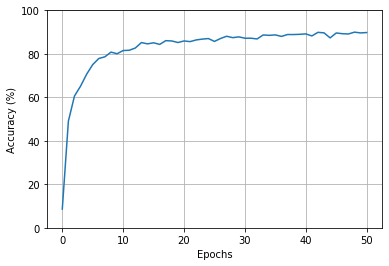

In [25]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("data/output.csv")
df = df[df["type"] == 1]
df['value1'] = df['value1'] * 100

plt.plot(df["epoch"], df["value1"], label = "GPU training")

plt.ylim([0, 100])
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.grid()
plt.show()

# Bar Graphs

### Getting data

In [15]:
import pandas as pd
from matplotlib import pyplot as plt

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

# Colab GPU
df = pd.read_csv("data/gpu50.csv")
df = df[df["type"] == 0]

# Local CPU
df1 = pd.read_csv("data/cpu15.csv")
df1 = df1[df1["type"] == 0]

# Colab S3
df2 = pd.read_csv("data/s3.csv")
df2 = df2[df2["type"] == 0]

# IBM COS
df4 = pd.read_csv("data/ibm-s3.csv")
df4 = df4[df4["type"] == 0]

# IBM VM GPU Training
df6 = pd.read_csv("data/ibm-gpu.csv")
df6 = df6[df6["type"] == 0]

df6.head()

,type,epoch,start,loading,duration,value1,value2
8,0,1,1.659406e+09,15.909727,62.921128,0.38900,0.81554
17,0,2,1.659406e+09,31.709230,125.718779,0.54660,0.90742
26,0,3,1.659406e+09,47.587896,188.591510,0.63872,0.93936
35,0,4,1.659406e+09,63.526479,251.517239,0.70394,0.95758
44,0,5,1.659406e+09,79.479064,314.466429,0.74516,0.96690


### Stacked bar of GPU vs CPU vs S3

Text(0, 0.5, 'Time (sec)')

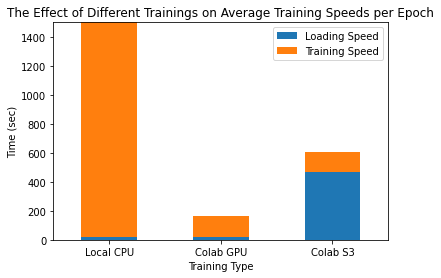

In [3]:
df3 = pd.DataFrame([['Local CPU', df1.iloc[-1]['loading'] / df1.iloc[-1]['epoch'], df1.iloc[-1]['duration'] / df1.iloc[-1]['epoch'] - df1.iloc[-1]['loading'] / df1.iloc[-1]['epoch']], 
                        ['Colab GPU', df.iloc[-1]['loading'] / df.iloc[-1]['epoch'], df.iloc[-1]['duration'] / df.iloc[-1]['epoch'] - df.iloc[-1]['loading'] / df.iloc[-1]['epoch']], 
                        ['Colab S3', df2.iloc[-1]['loading'] / df2.iloc[-1]['epoch'], df2.iloc[-1]['duration'] / df2.iloc[-1]['epoch'] - df2.iloc[-1]['loading'] / df2.iloc[-1]['epoch']]],
                  columns=['Training Type', 'Loading Speed', 'Training Speed'])
df3.plot(x='Training Type', kind='bar', stacked=True,
        title='The Effect of Different Trainings on Average Training Speeds per Epoch')
plt.ylim([0, 1500])
plt.xticks(rotation=0, horizontalalignment="center")
plt.ylabel("Time (sec)")

### IBM VM-IBM COS versus Colab-S3

Text(0, 0.5, 'Time (sec)')

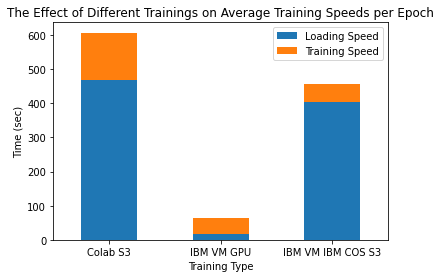

In [20]:
df5 = pd.DataFrame([['Colab S3', df2.iloc[-1]['loading'] / df2.iloc[-1]['epoch'], df2.iloc[-1]['duration'] / df2.iloc[-1]['epoch'] - df2.iloc[-1]['loading'] / df2.iloc[-1]['epoch']], 
                    ['IBM VM GPU', df6.iloc[-1]['loading'] / df6.iloc[-1]['epoch'], df6.iloc[-1]['duration'] / df6.iloc[-1]['epoch'] - df6.iloc[-1]['loading'] / df6.iloc[-1]['epoch']],
                    ['IBM VM IBM COS S3', df4.iloc[-1]['loading'] / df4.iloc[-1]['epoch'], df4.iloc[-1]['duration'] / df4.iloc[-1]['epoch'] - df4.iloc[-1]['loading'] / df4.iloc[-1]['epoch']]],
                  columns=['Training Type', 'Loading Speed', 'Training Speed'])
df5.plot(x='Training Type', kind='bar', stacked=True,
        title='The Effect of Different Trainings on Average Training Speeds per Epoch')
plt.xticks(rotation=0, horizontalalignment="center")
plt.ylabel("Time (sec)")